# HW #1

## Question 2.1: Probability Theory

> (10 pts) a: Implement a function, “coin_flip_prop”, that calculates the probability of having heads (ℎ) using `numpy.random.binomial(k, 𝜋, t)` = h, where k is the number of coins, 𝜋 is the probability of each coin, 𝑡 is the number of total flips, and h is head. 

> b: To confirm the `coin_flip_prop` function applicability, show that the probability reaches 0.5 as N increases from 1 to 200 when k=1. Make a visualization.  

**Imports**

In [20]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
np.random.seed(559)

print(f"For this hw, I used Python v{sys.version}")

For this hw, I used Python v3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


### 2.1.a The function

In [13]:
from numpy import random as np_random

def coin_flip_prop(k: int, N: int, heads_probability=0.5) -> float:
    """
    For this binomial distribution, we set the following parameters:
        k = # of coins, aka "trials" in this experiment
        𝜋 = 0.5, or the probability of "success"
            (which in this case is landing on heads)
        N = # of flips the user wants
            --> n = 50*N, which is the total number of flips
                (aka "tests") that we shall do
    
    Returns: probability of having at least 1 heads
    """
    num_coins, num_tests = k, 50 * N
    samples_drawn = np_random.binomial(
        num_coins, heads_probability, num_tests
    )
    return sum(samples_drawn >= 1) / num_tests

In [29]:
coin_flip_prop(1, 1)  # sanity check - should be ~0.50

0.52

### 2.1.b The Visualization

In [45]:
num_flips = list(range(1, 201))
probabilities = [
    coin_flip_prop(1, flip_num) for flip_num in num_flips
]
expected_probability = [0.5 for _ in num_flips]

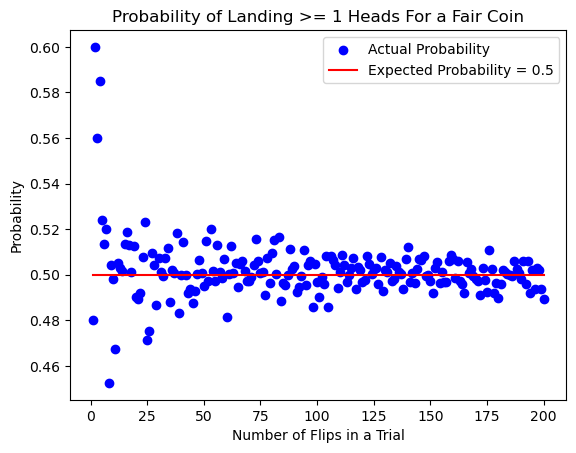

In [46]:
plt.scatter(num_flips, probabilities,
            color="blue", label="Actual Probability")
plt.plot(num_flips, expected_probability,
        color="red", label="Expected Probability = 0.5")
plt.legend()
plt.title("Probability of Landing >= 1 Heads For a Fair Coin")
plt.ylabel("Probability")
plt.xlabel("Number of Flips in a Trial")
plt.show()

As we can see above, most of the observed probabilities from each trial do indeed hover around `0.50` (with the exception of a outliers).

## Question 2.3: Average Probability

In [53]:
avg = round(sum(probabilities) / 200, 4)
print(f"The average probability across all trials where N = [1 ... 200]: {avg}.")

The average probability across all trials where N = [1 ... 200]: 0.5018.
